In [1]:
%cd '/content/drive/My Drive/Colab Notebooks/Mini_Project'

/content/drive/My Drive/Colab Notebooks/Mini_Project


**Accuracy Of Each Models**

In [2]:
import plotly.graph_objects as go

In [ ]:
y_tr=[ 0.7623	  ,0.79	     ,0.7518	  ,0.7387   ,0.7623,	0.7135]
y_tst=[0.7313 , 0.7293     ,0.6808	  ,0.7051	  , 0.7434	,0.7111]
x= ['CNN','DenseNet','MobileNet','ResNet','VGG','Xception']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y_tr,name='Train'))
fig.add_trace(go.Bar(x=x, y=y_tst,name='Validation'))
fig.update_layout(autosize=False,
    width=700,
    height=450,title='Performance of Different Models',xaxis_title="Models",
    yaxis_title="Accuracy",)
fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=40)
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[0.3, 1])
fig.show()

In [3]:
import os
os.chdir('Models')

In [10]:
ls

DenseNet.h5  exception.h5  MobileNetmodel.h5  ResNetmode-3.h5  VGG19.h5


In [11]:
model_list=os.listdir()

In [12]:
model_list

['DenseNet.h5',
 'MobileNetmodel.h5',
 'ResNetmode-3.h5',
 'VGG19.h5',
 'exception.h5']

In [13]:
base_path='/content/drive/My Drive/Colab Notebooks/Mini_Project/'
%cd '/content/drive/My Drive/Colab Notebooks/Mini_Project'

/content/drive/My Drive/Colab Notebooks/Mini_Project


In [14]:
ls


 dataset@   Models/   test@  'Unwanted Models'/


In [15]:
os.chdir('test')

In [16]:
images=os.listdir()

In [43]:
images

['2020.02.26.20026989-p34-114_2%0.png',
 '2020.02.10.20021584-p6-52%5.png',
 '2020.03.03.20030775-p11-91.png',
 '2020.02.10.20021584-p6-52%10.png',
 '1%0.jpg',
 '1101.png']

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from keras.models import load_model
import numpy as np

**Prediction For Test Images**

   The new test images which is not used for training

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pa=base_path+'/Models/VGG19.h5'

model = load_model(pa)

model.compile(loss='categorical_crossentropy',

              optimizer='Adam',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
from keras.preprocessing import image

Class 0 = Covid;
Class 1= Non Covid;

The Predicted Value For Each Class is ---> [[0.30987883 0.6901212 ]]
The Predicted Class is --> 1
So CT Scan is COVID Negative


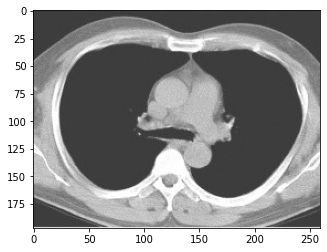

In [27]:
path=images[4]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Covid Positive',1:'COVID Negative'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So CT Scan is",decode[result])

The Predicted Value For Each Class is ---> [[0.81878036 0.18121961]]
The Predicted Class is --> 0
So CT Scan is Covid Positive


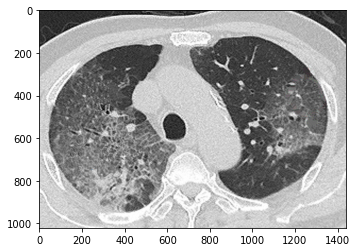

In [ ]:
path=images[2]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Covid Positive',1:'COVID Negative'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So CT Scan is",decode[result])

The Predicted Value For Each Class is ---> [[0.6628218  0.33717817]]
The Predicted Class is --> 0
So CT Scan is Covid Positive


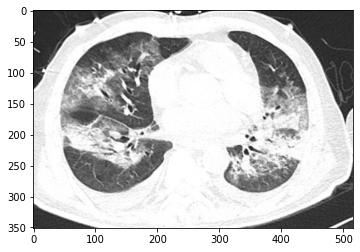

In [ ]:
path=images[0]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Covid Positive',1:'COVID Negative'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So CT Scan is",decode[result])

The Predicted Value For Each Class is ---> [[0.42817825 0.57182175]]
The Predicted Class is --> 1
So CT Scan is COVID Negative


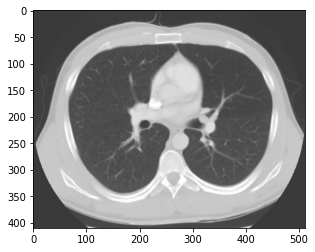

In [ ]:
path=images[5]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Covid Positive',1:'COVID Negative'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So CT Scan is",decode[result])

**Grad CAM Image**

In [20]:
from keras.models import load_model
pa=base_path+'/Models/VGG19.h5'

model = load_model(pa)


In [21]:
model

In [22]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model

import tensorflow as tf

import numpy as np
import imutils
import cv2

In [23]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [24]:
from keras.models import load_model
pa=base_path+'/Models/VGG19.h5'

model = load_model(pa)

Generation Of GradCam Image for Covid and Non Covid Image

example1

In [28]:
image = load_img(images[5], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [29]:
preds = model.predict(image)
clas= np.argmax(preds)
print("Class", clas, "is -->" ,decode[clas])

Class 1 is --> COVID Negative


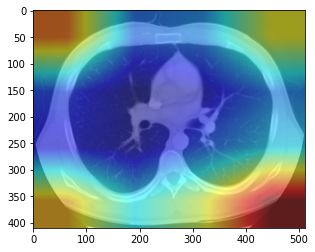

In [30]:
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[5])
resized = cv2.resize(orig, (128,128))
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)

example2

In [31]:
image = load_img(images[4], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [32]:
preds = model.predict(image)
clas= np.argmax(preds)
print("Class", clas, "is -->" ,decode[clas])

Class 1 is --> COVID Negative


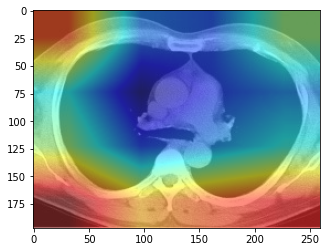

In [33]:
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[4])
resized = cv2.resize(orig, (128,128))
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)

example3

In [ ]:
image = load_img(images[0], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [ ]:
preds = model.predict(image)
clas= np.argmax(preds)
print("Class",clas,"is -->",decode[clas])

Class 0 is --> Covid Positive


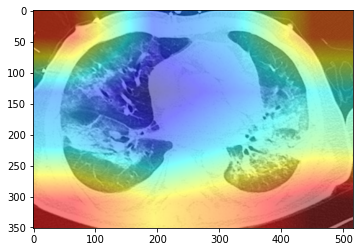

In [ ]:
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[0])
resized = cv2.resize(orig, (128,128))
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)

example4

In [40]:
image = load_img(images[2], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [41]:
preds = model.predict(image)
clas= np.argmax(preds)
print("Class",clas,"is -->",decode[clas])

Class 0 is --> Covid Positive


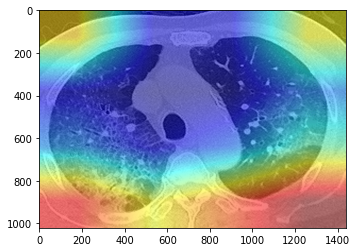

In [42]:
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[2])
resized = cv2.resize(orig, (128,128))
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)